# Mnist Local Generator Usage Script
 - mnist local generator 는 localization 문제를 해결하기 위해 필요한 MNIST toy dataset 을 제공합니다. 
 - 하나의 이미지에 0~9 까지의 숫자가 들어가며 숫자가 없는 배경 정보도 들어가 있습니다.   
 (※ 배경 정보 class index 는 10으로 되어 있습니다.)
 - trian 데이터는 약 66000 장이며 test 데이터는 약 11000 장 정도를 생성합니다. <br>
  (※ background option 을 False 로 주면 60,000 장 10,000 장이 생성됩니다.)
 - 데이터는 classification 정보와 객체 위치 정보를 제공합니다. 위치 정보는 cx cy w h 방법으로 제공합니다. 

 - 사용 방법은 아래 script 을 참조하세요

In [10]:
from mnist_local_generator import mnist_localization_generator
from utils import plot_images, images_with_rectangles, xywh2xyxy
import numpy as np 
import cv2

## Usage  
 - train ,test image 및 라벨 정보를 생성합니다. 

In [4]:
# Generate Mnist data for localization
(train_xs, train_cls_ys, train_reg_ys), (test_xs, test_cls_ys, test_reg_ys) = \
    mnist_localization_generator((84, 84), (100, 100), background=True, n_sample=None,)

배경 class가 포함되어 class 는 11로 설정 되어 있습니다.


  0%|          | 0/6000 [00:00<?, ?it/s]

object 가 없는 background 이미지를 추가합니다.(전체 이미지의 10%)
background 의 class 는 11로 설정 되어 있습니다.
background 의 regression 는 (0,0,0,0)로 설정 되어 있습니다.


100%|██████████| 1000/1000 [00:00<00:00, 2403.52it/s]


### Shape checking 

In [5]:
print(train_xs.shape, train_cls_ys.shape, train_reg_ys.shape)
print(test_xs.shape, test_cls_ys.shape, test_reg_ys.shape)

(66000, 84, 84, 1) (66000, 1, 1, 11) (66000, 1, 1, 4)
(11000, 100, 100, 1) (11000, 1, 1, 11) (11000, 1, 1, 4)


### Image checking

In [6]:
# 총 데이터에서 순서대로 64개만 확인합니다. 
n_samples = 64
foreground_slice = slice(0, n_samples, 1)
background_slice = slice(60000, 60000+n_samples , 1)

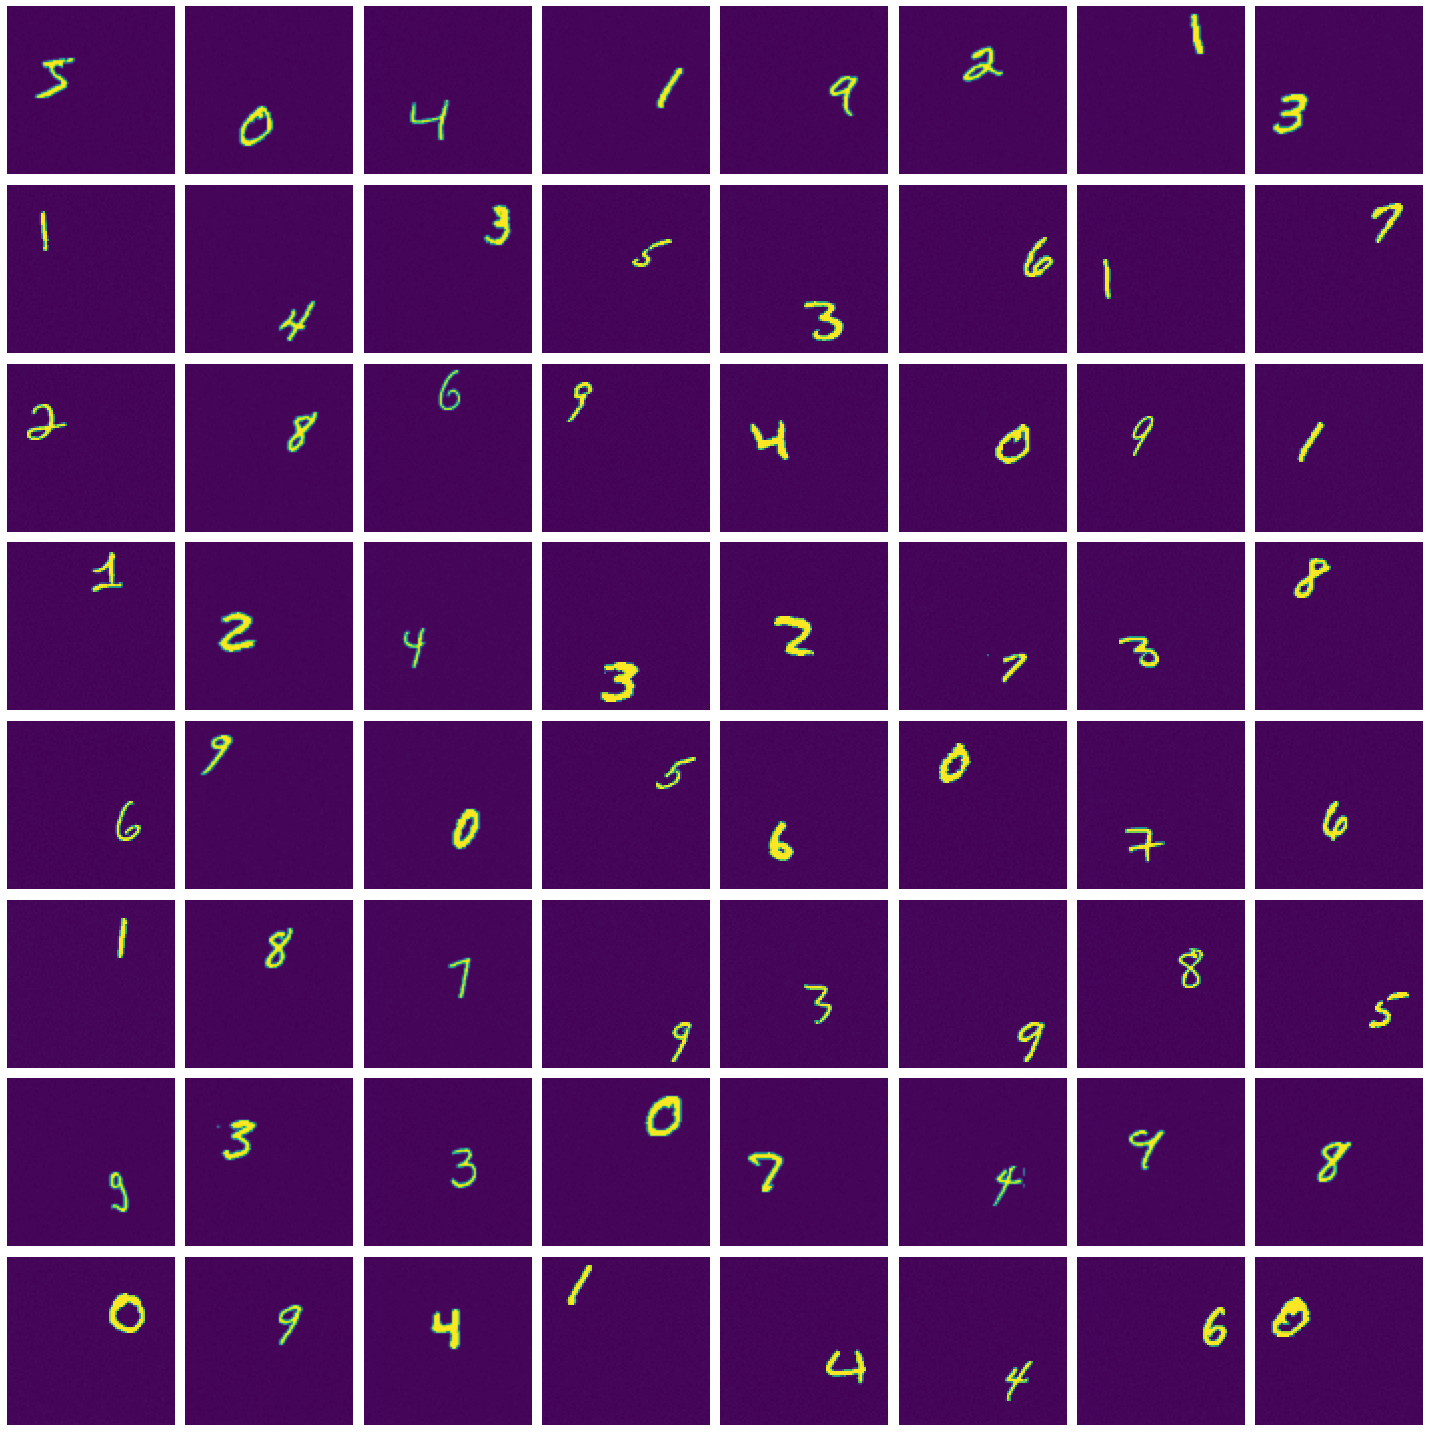

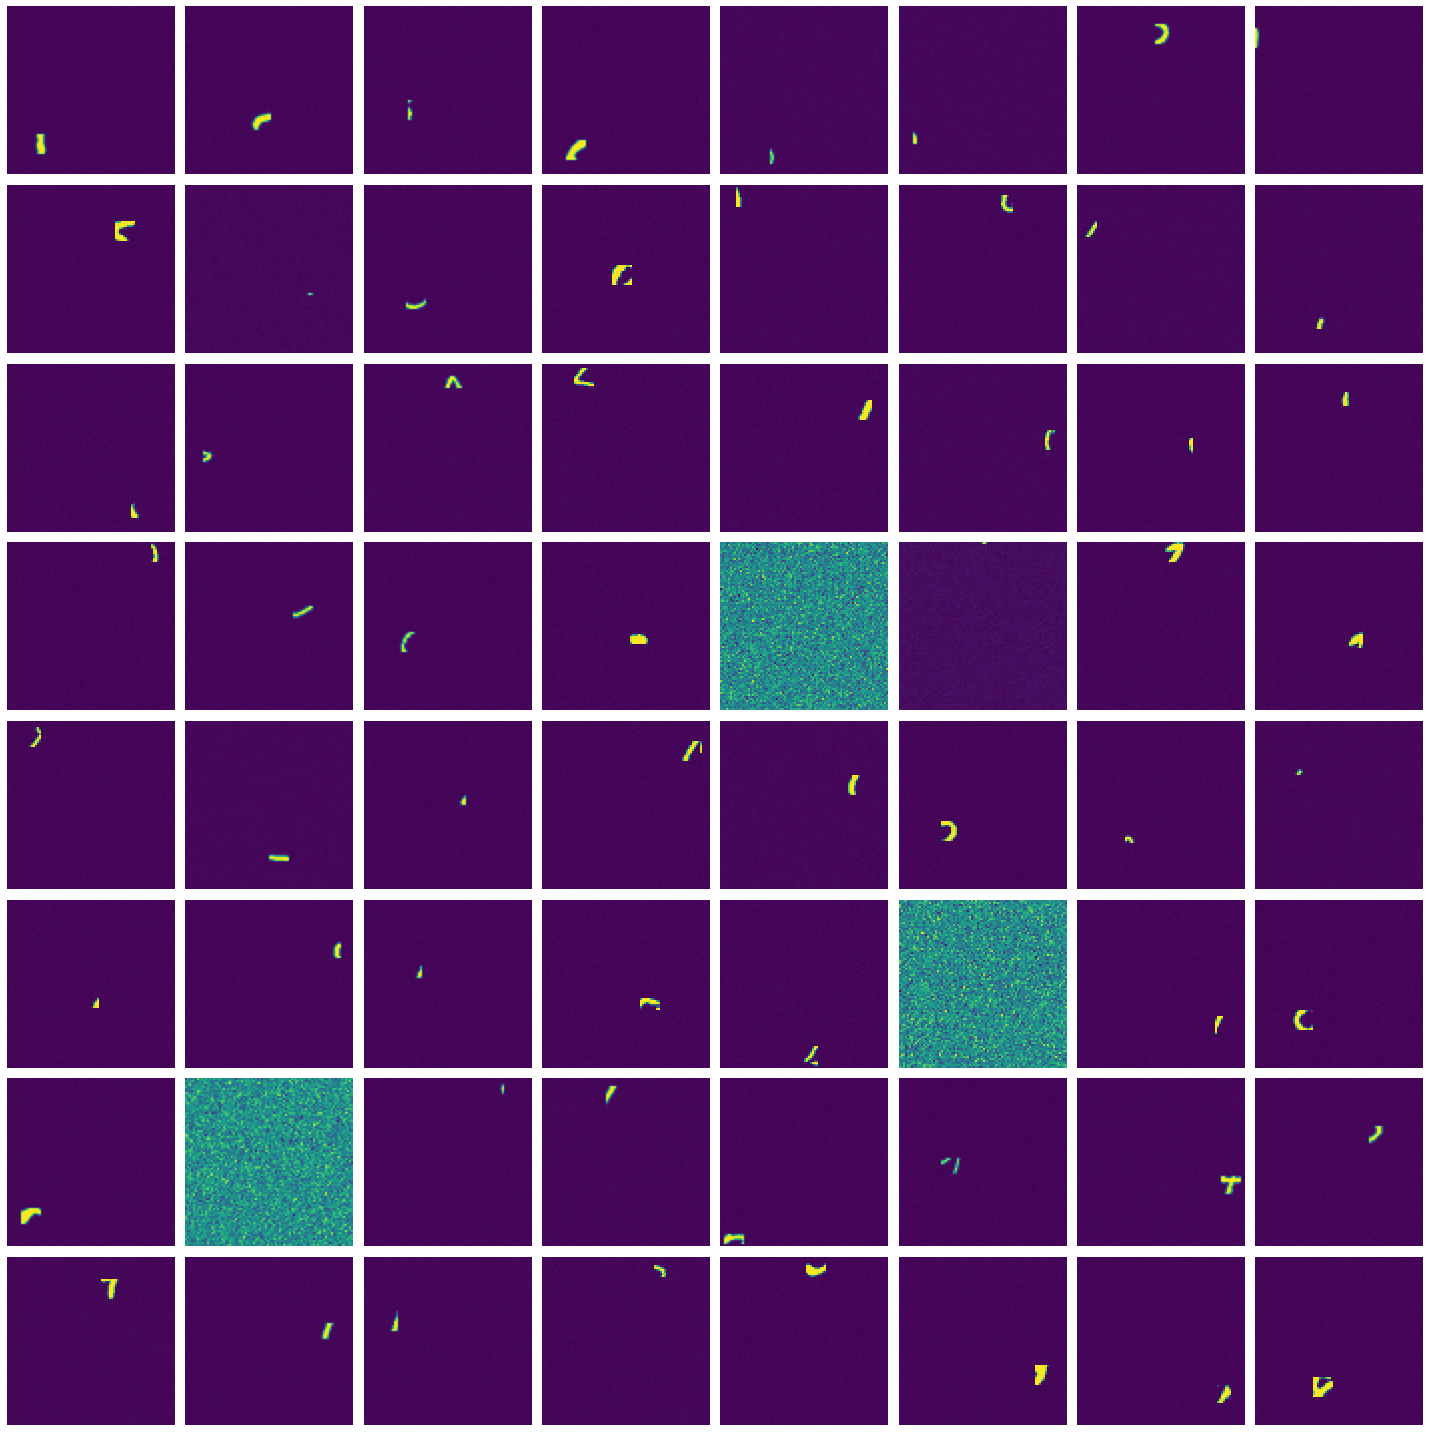

In [7]:
plot_images(train_xs[foreground_slice])
plot_images(train_xs[background_slice])

### Classification checking

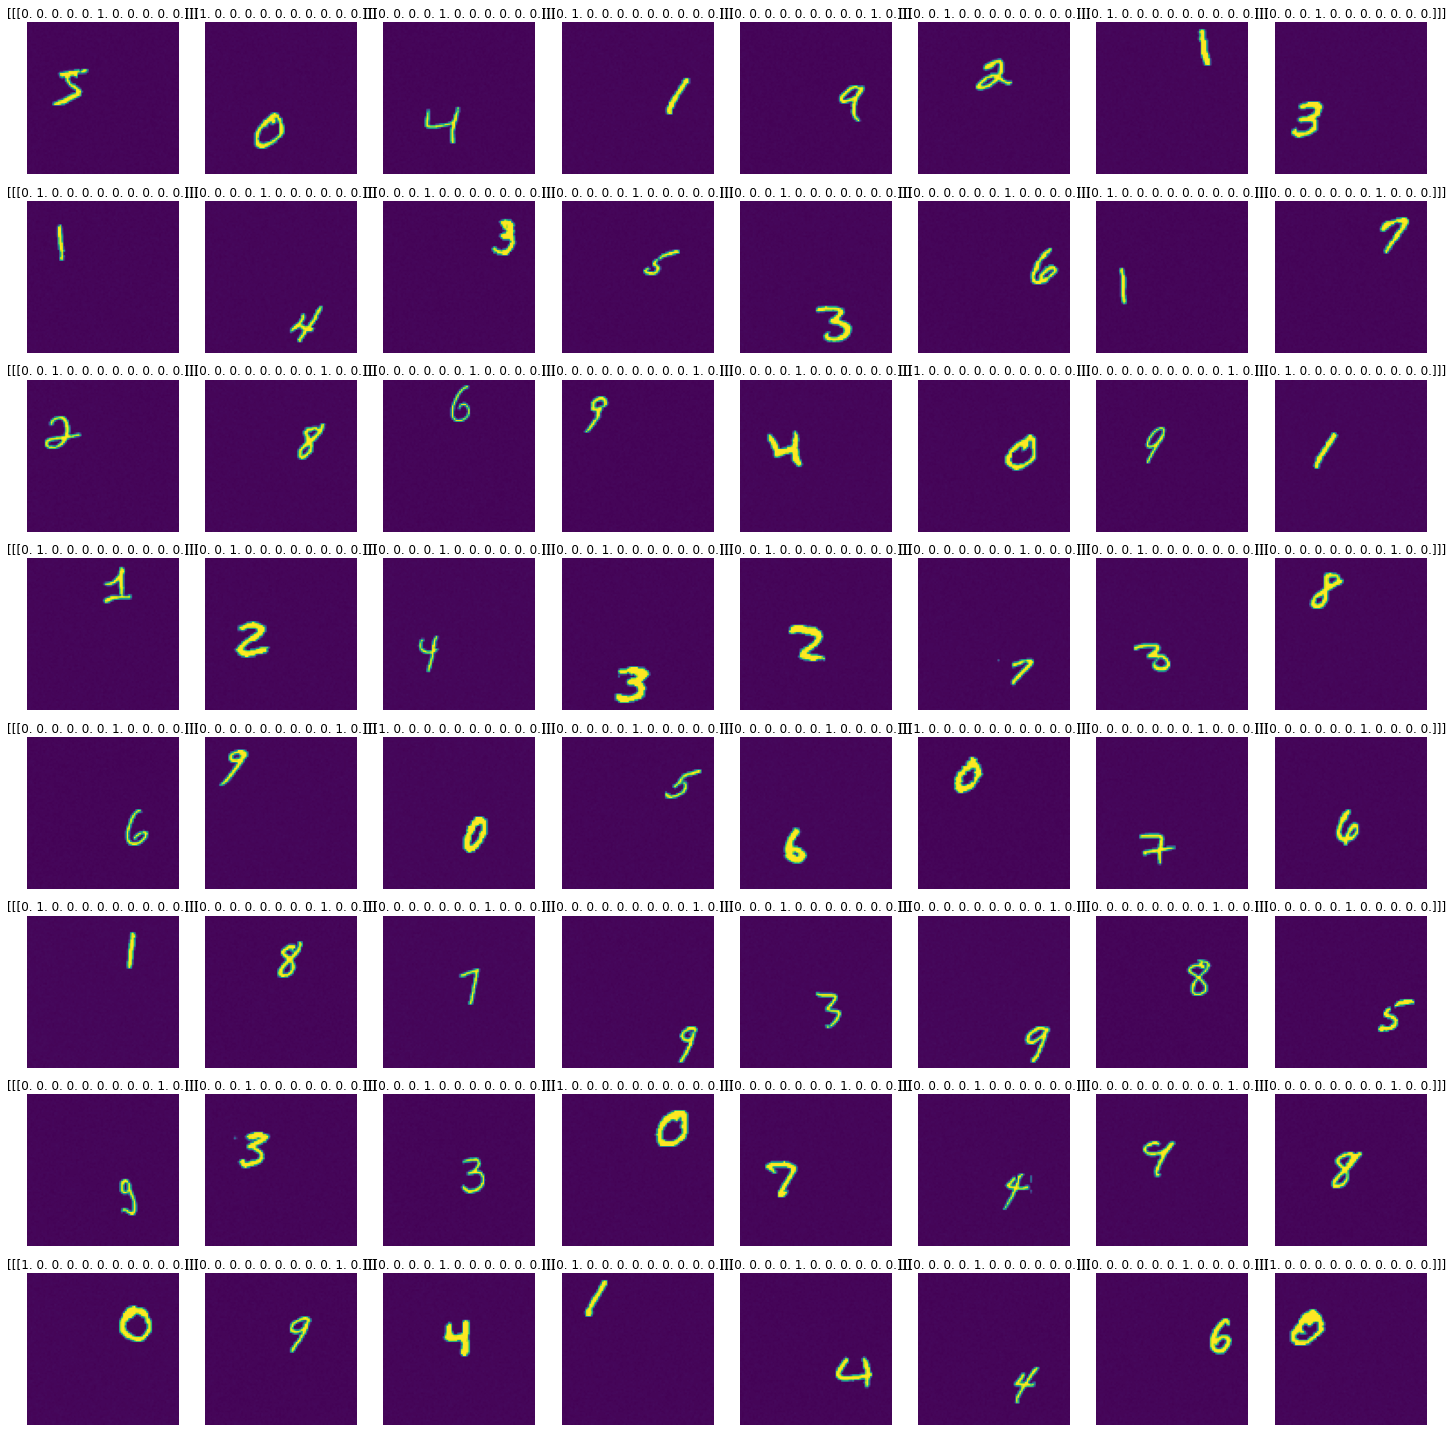

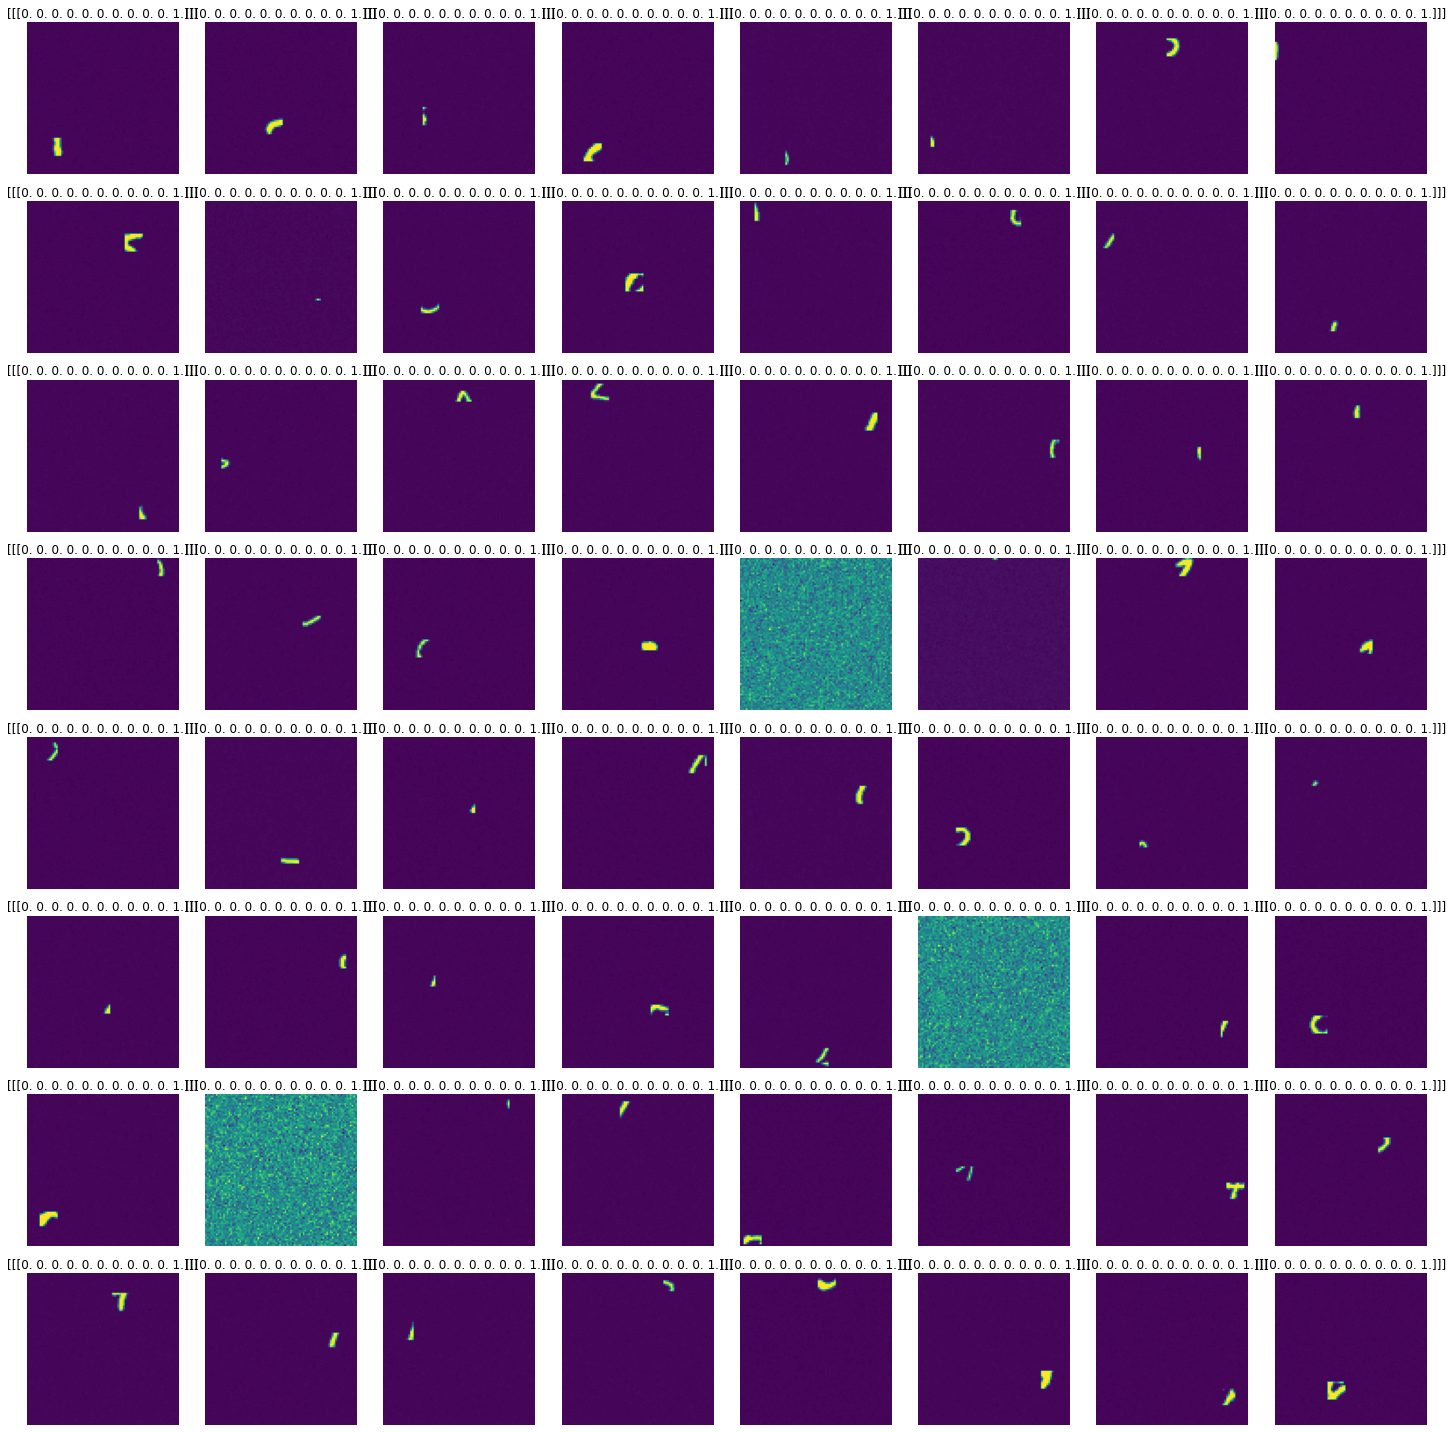

In [8]:
plot_images(train_xs[foreground_slice], train_cls_ys[foreground_slice])
plot_images(train_xs[background_slice], train_cls_ys[background_slice])

### Regression checking

In [14]:
images_with_rectangles?

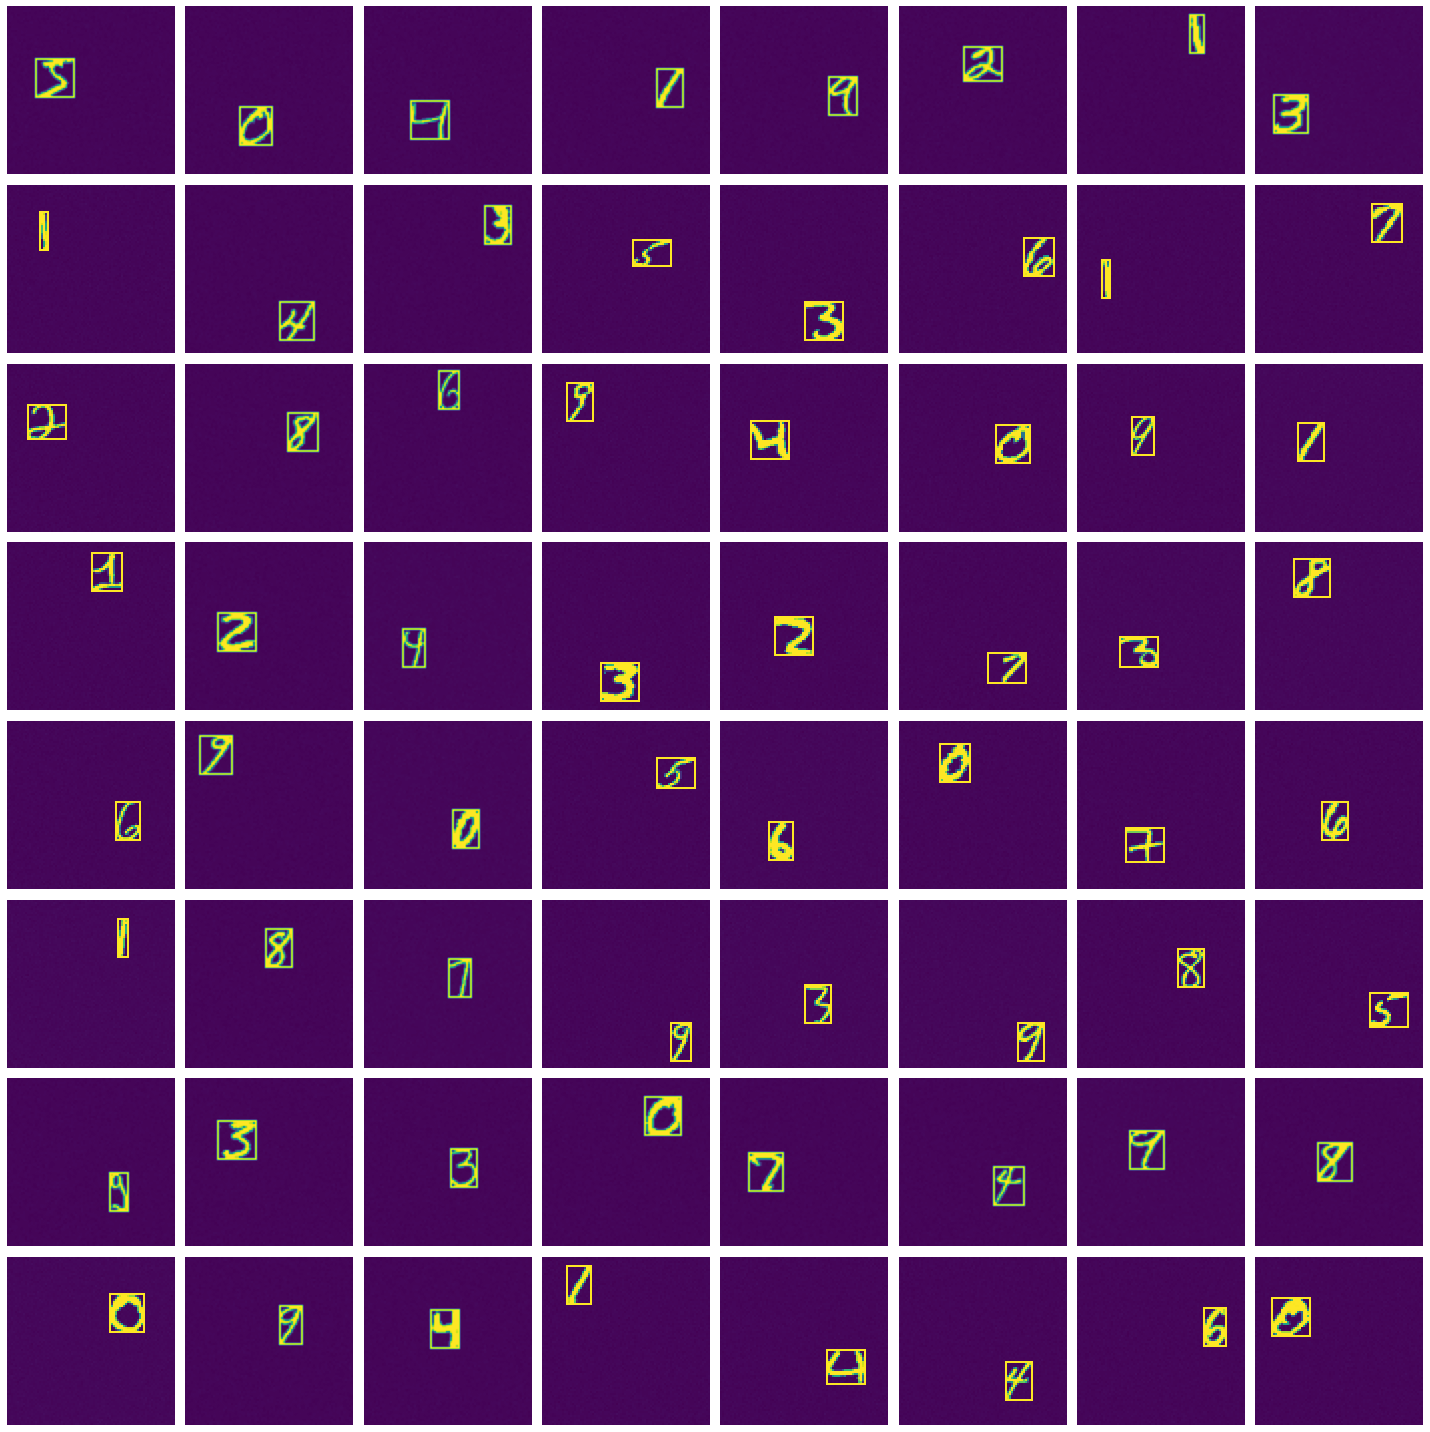

In [11]:
# foreground checking 
trgt_reg_ys = train_reg_ys[foreground_slice].reshape(-1, 1, 4) # N ,1 ,1 ,4 -> # N, 1, 4
trgt_reg_ys = xywh2xyxy(trgt_reg_ys)
rected_images = images_with_rectangles(train_xs[foreground_slice], trgt_reg_ys)
plot_images(rected_images)

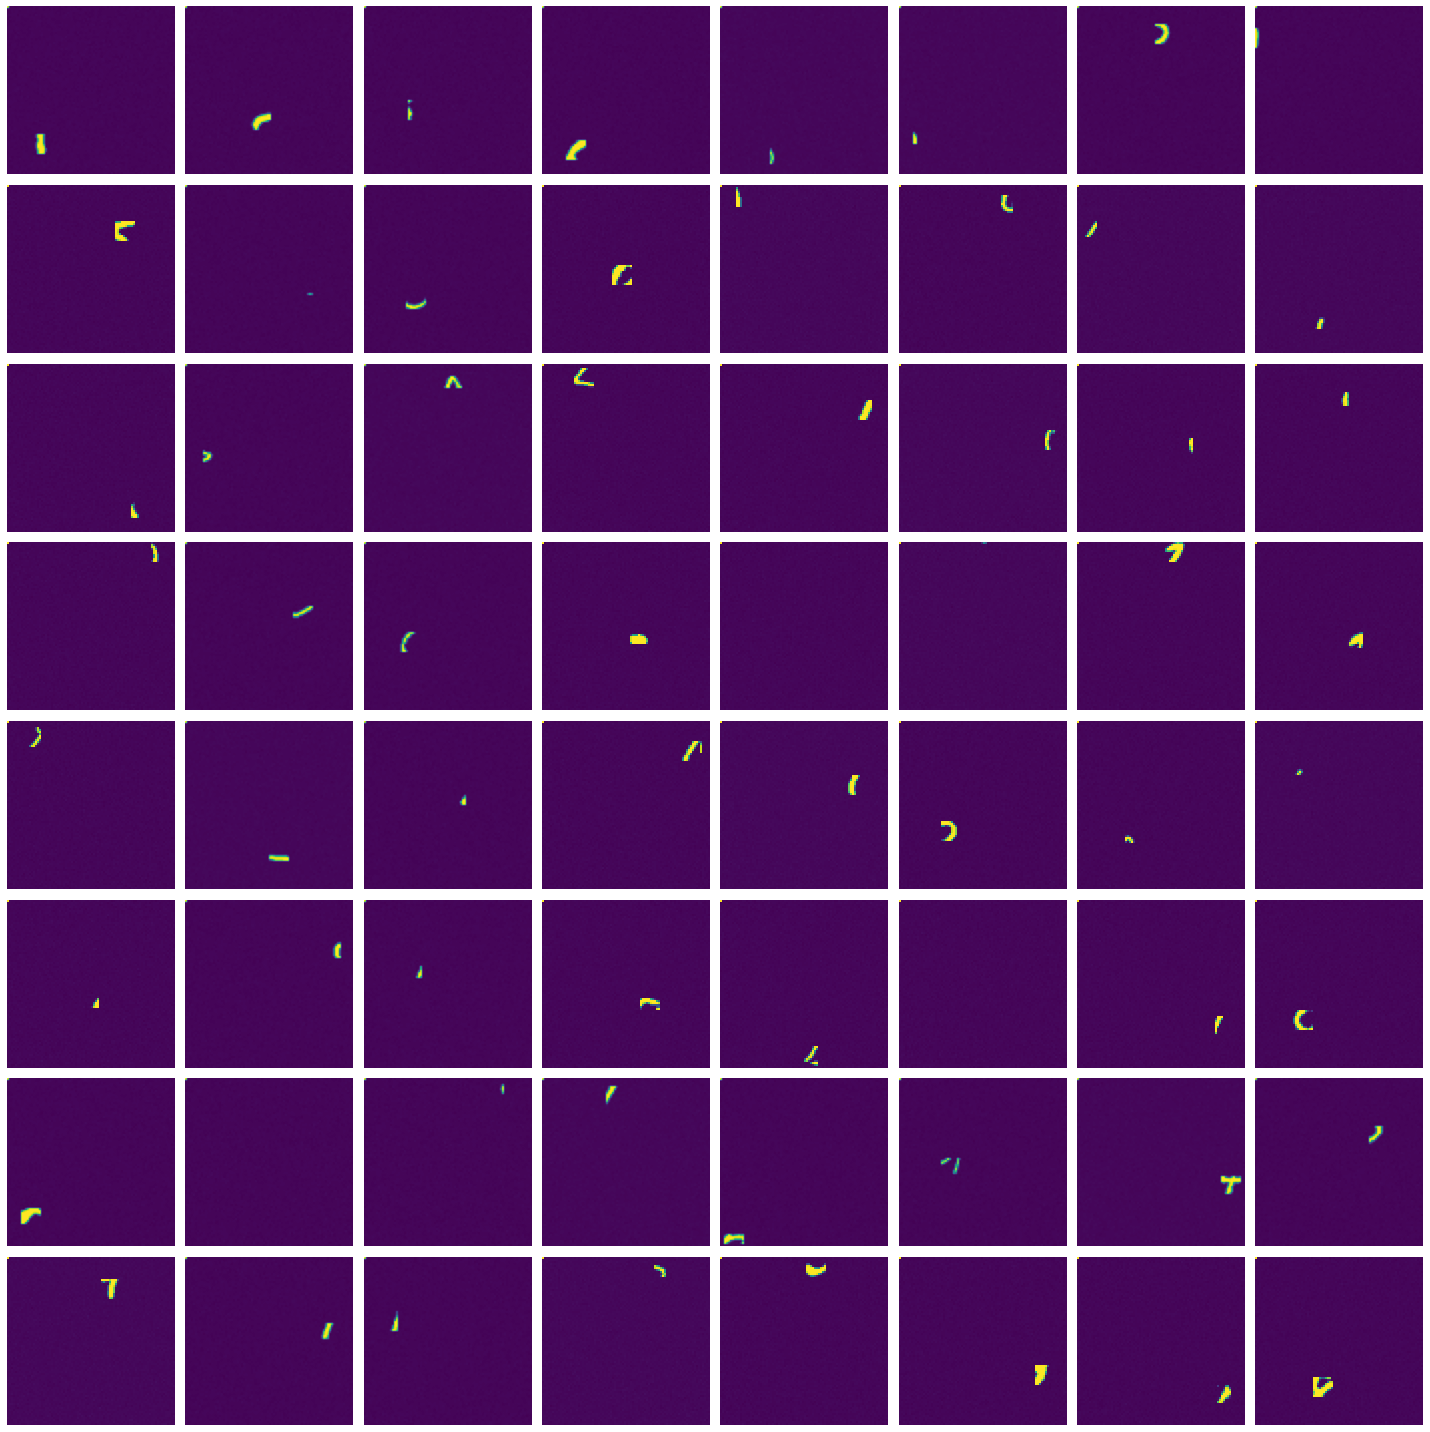

In [12]:
# background checking 
trgt_reg_ys = train_reg_ys[background_slice].reshape(-1, 1, 4)
trgt_reg_ys = xywh2xyxy(trgt_reg_ys)
rected_images = images_with_rectangles(train_xs[background_slice], trgt_reg_ys)
plot_images(rected_images)

In [15]:
train_reg_ys[background_slice]

array([[[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.]]],


       [